In [1]:
import numpy as np
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("/Users/shehabsalah/Desktop/diabetes.xlsx", header=1)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               6144 non-null   int64  
 1   Glucose                   6144 non-null   int64  
 2   BloodPressure             6144 non-null   int64  
 3   SkinThickness             6144 non-null   int64  
 4   Insulin                   6144 non-null   int64  
 5   BMI                       6144 non-null   float64
 6   DiabetesPedigreeFunction  6144 non-null   float64
 7   Age                       6144 non-null   int64  
 8   Outcome                   6144 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 432.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.367658,31.954396,19.344776,15.943126,115.178323,7.879667,0.331140,11.753529,0.476680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.duplicated().sum()

np.int64(5376)

In [7]:
data.drop_duplicates(inplace=True)

In [7]:
# إزالة المسافات الزائدة في أسماء الأعمدة
data.columns = data.columns.str.strip()
print(data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [8]:
# إعادة ترتيب الأعمدة بحيث عمود "Outcome" في النهاية
columns_order = [col for col in data.columns if col != 'Outcome'] + ['Outcome']
data = data[columns_order]
print(data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
# تعريف الأعمدة التي تحتوي على قيم صفرية أو مفقودة
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# استبدال القيم المفقودة في الأعمدة المحددة باستخدام المتوسط
imputer = SimpleImputer(strategy='mean')

# تطبيق المعالج على الأعمدة المعنية
data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


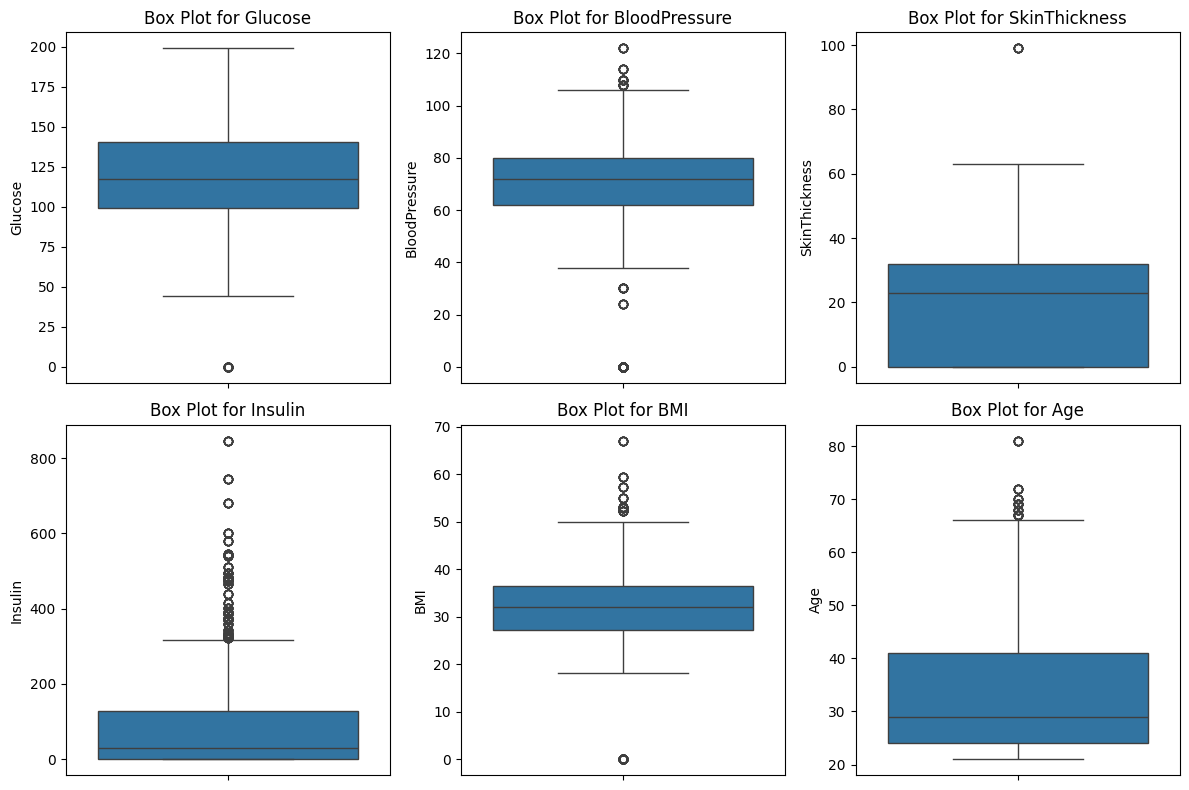

In [10]:
# رسم Box Plot لاكتشاف القيم الشاذة (Outliers) في الأعمدة العددية
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# رسم box plot لكل عمود عددي
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # تقسيم الرسم إلى 2 صفوف و 3 أعمدة
    sns.boxplot(data[column])
    plt.title(f"Box Plot for {column}")

plt.tight_layout()
plt.show()


In [11]:
for col in numerical_columns:
    # التأكد من أن القيم في العمود هي أرقام فقط
    if not pd.api.types.is_numeric_dtype(data[col]):
        print(f"العمود {col} يحتوي على قيم غير رقمية.")
    else:
        print(f"العمود {col} يحتوي فقط على قيم رقمية.")
categorical_columns = []  # أدخل الأعمدة الفئوية إذا كانت موجودة
for col in categorical_columns:
    if not pd.api.types.is_categorical_dtype(data[col]):
        print(f"العمود {col} يحتوي على قيم غير فئوية.")
    else:
        print(f"العمود {col} يحتوي فقط على قيم فئوية.")


العمود Glucose يحتوي فقط على قيم رقمية.
العمود BloodPressure يحتوي فقط على قيم رقمية.
العمود SkinThickness يحتوي فقط على قيم رقمية.
العمود Insulin يحتوي فقط على قيم رقمية.
العمود BMI يحتوي فقط على قيم رقمية.
العمود Age يحتوي فقط على قيم رقمية.


In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

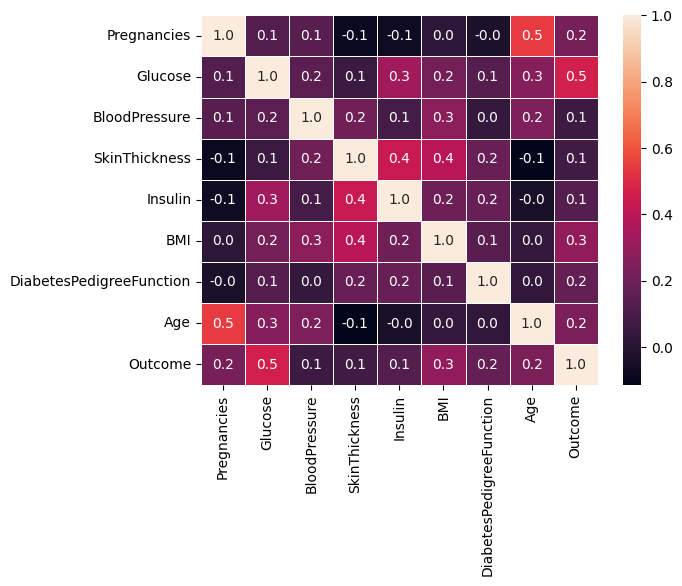

In [13]:
sns.heatmap(data.corr(), annot=True, fmt='0.1f',linewidth=.5)

<Axes: xlabel='Outcome', ylabel='count'>

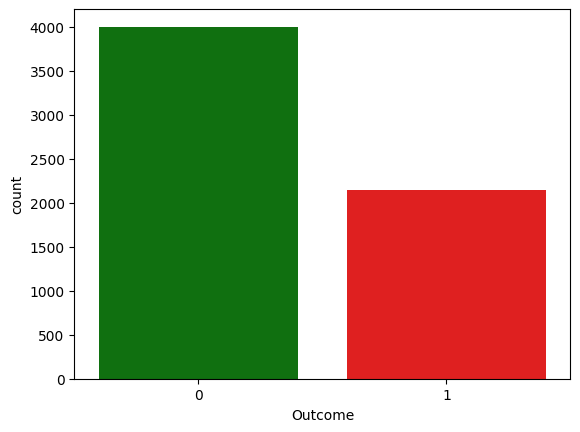

In [14]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

<function matplotlib.pyplot.show(close=None, block=None)>

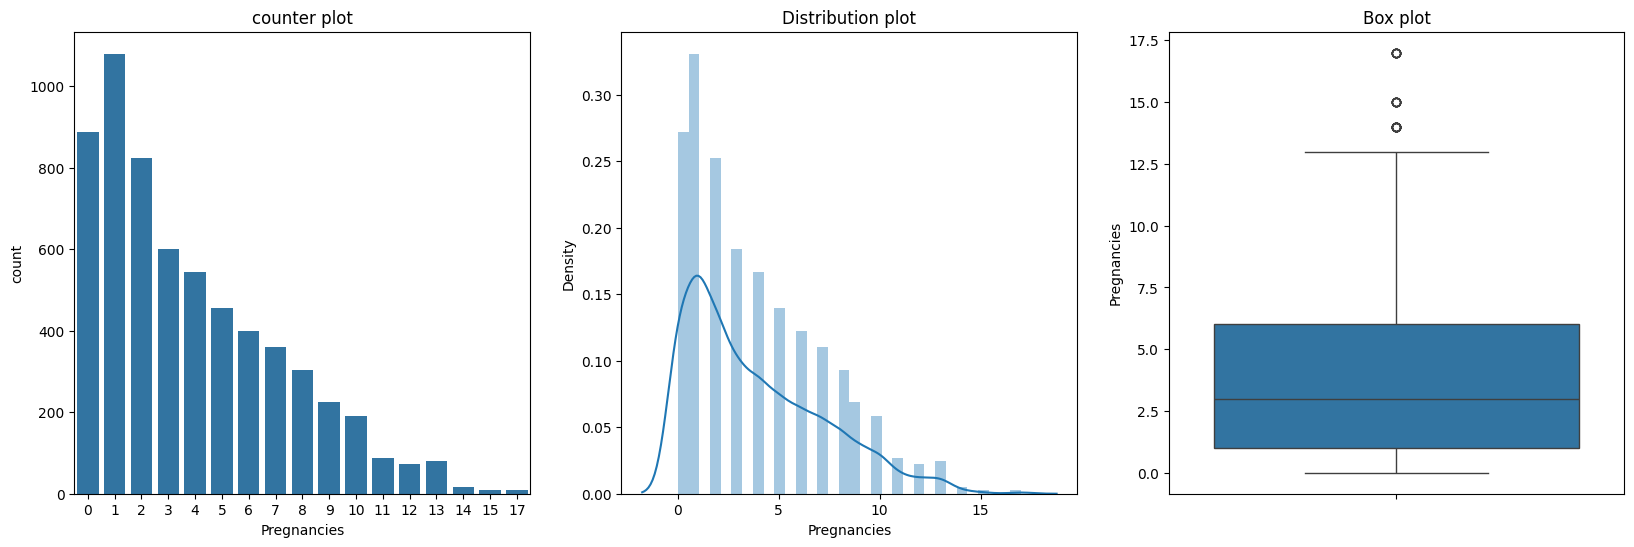

In [15]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("counter plot")
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title("Distribution plot")
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title("Box plot")
sns.boxplot(data["Pregnancies"])

plt.show



In [16]:
#create


In [17]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [19]:
model1=LogisticRegression()

In [20]:
model1.fit(x_train,y_train)

LogisticRegression()

In [21]:
colums=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]
result4=[]
result5=[]

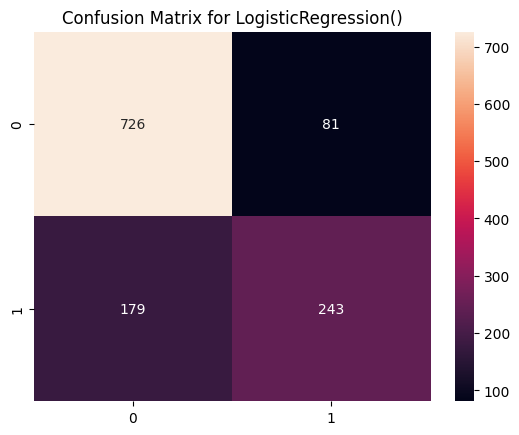

LogisticRegression()
accuracy is: 0.7884458909682669 recall is: 0.5758293838862559 f1 is: 0.6514745308310992 roc_auc: 0.73772881833718 precision: 0.75


In [22]:

def cal(model, x_test, y_test):
    pre = model1.predict(x_test)
    
    # حساب المقاييس المطلوبة
    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre)
    f1 = f1_score(y_test, pre)
    precision = precision_score(y_test, pre)
    roc_auc = roc_auc_score(y_test, pre)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    result4.append(precision)
    result5.append(roc_auc)
    
    sns.heatmap(confusion_matrix(y_test, pre), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {model}")
    plt.show()
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1 ,'roc_auc:',roc_auc,'precision:',precision)
    
# استخدام الدالة مع النموذج
cal(model1, x_test, y_test)


In [23]:
model2=SVC()

In [24]:
model2.fit(x_train,y_train)

SVC()

SVC()
accuracy is: 0.7819365337672904 recall is: 0.7711267605633803 f1 is: 0.6203966005665722 roc_auc: 0.719206058363725 precision: 0.7711267605633803


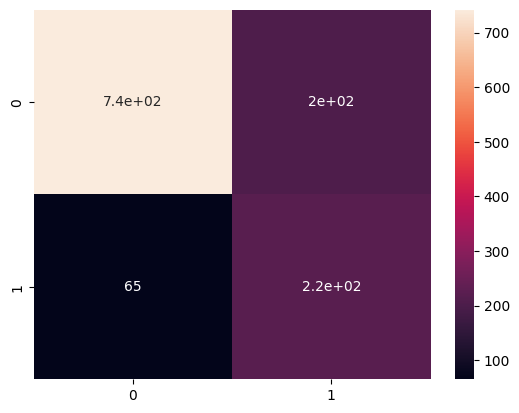

In [25]:

def cal(model):
    pre=model2.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    precision = precision_score(y_test, pre)
    roc_auc = roc_auc_score(y_test, pre)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    result4.append(precision)
    result5.append(roc_auc)
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1 ,'roc_auc:',roc_auc,'precision:',precision)
cal(model2)

In [26]:
model3=RandomForestClassifier()

In [27]:
model3.fit(x_train,y_train)

RandomForestClassifier()

RandomForestClassifier()
accuracy is: 1.0 recall is: 1.0 f1 is: 1.0 roc_auc: 1.0 precision: 1.0


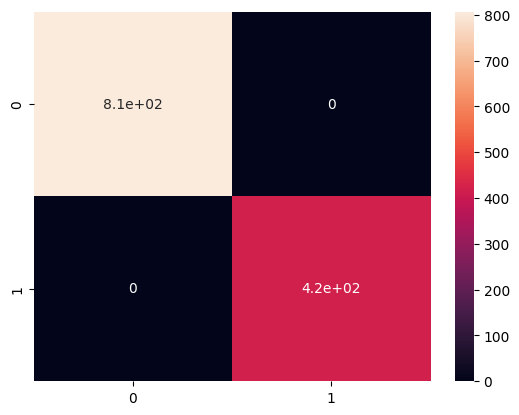

In [28]:

def cal(model):
    pre=model3.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    precision = precision_score(y_test, pre)
    roc_auc = roc_auc_score(y_test, pre)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    result4.append(precision)
    result5.append(roc_auc)
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1 ,'roc_auc:',roc_auc,'precision:',precision)
cal(model3)

In [29]:
model4=GradientBoostingClassifier(n_estimators=1000)

In [30]:
model4.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=1000)

GradientBoostingClassifier(n_estimators=1000)
accuracy is: 1.0 recall is: 1.0 f1 is: 1.0 roc_auc: 1.0 precision: 1.0


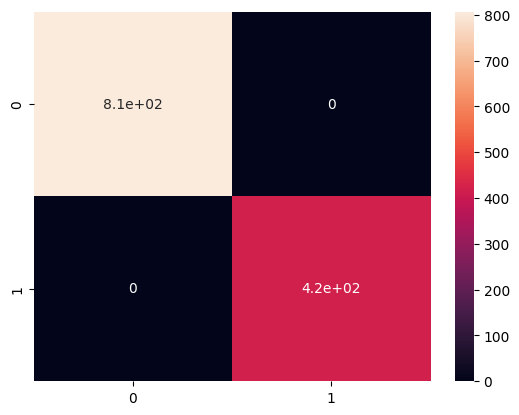

In [31]:

def cal(model):
    pre=model4.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    precision = precision_score(y_test, pre)
    roc_auc = roc_auc_score(y_test, pre)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    result4.append(precision)
    result5.append(roc_auc)
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1 ,'roc_auc:',roc_auc,'precision:',precision)
cal(model4)

In [32]:
result1

[0.7884458909682669, 0.7819365337672904, 1.0, 1.0]

In [33]:
result2

[np.float64(0.5758293838862559),
 np.float64(0.7711267605633803),
 np.float64(1.0),
 np.float64(1.0)]

In [34]:
result3

[np.float64(0.6514745308310992),
 np.float64(0.6203966005665722),
 np.float64(1.0),
 np.float64(1.0)]

In [35]:
result4

[np.float64(0.75),
 np.float64(0.7711267605633803),
 np.float64(1.0),
 np.float64(1.0)]

In [36]:
result5

[np.float64(0.73772881833718),
 np.float64(0.719206058363725),
 np.float64(1.0),
 np.float64(1.0)]

In [37]:
pd.DataFrame({'Algorithm':colums,'Accuracies':result1,'recall':result2,'F1score':result3,'roc_auc':result5,'precision':result4})

,Algorithm,Accuracies,recall,F1score,roc_auc,precision
0,LogisticRegression,0.788446,0.575829,0.651475,0.737729,0.750000
1,SVC,0.781937,0.771127,0.620397,0.719206,0.771127
2,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
3,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
FinalResult=pd.DataFrame({'Algorithm':colums,'Accuracies':result1,'recall':result2,'F1score':result3,'roc_auc':result5,'precision':result4})

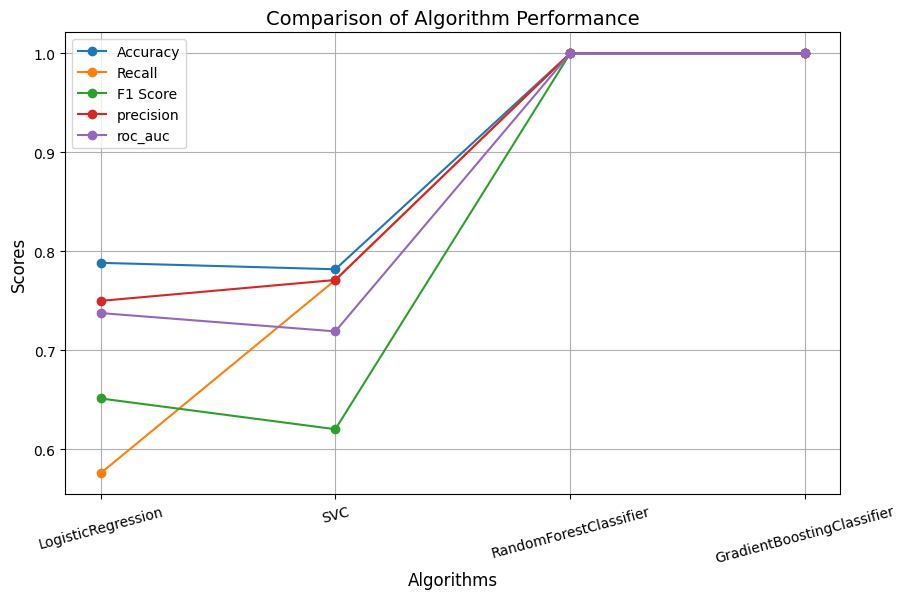

In [39]:
plt.figure(figsize=(10, 6))

# رسم الخطوط
plt.plot(FinalResult['Algorithm'], FinalResult['Accuracies'], marker='o', label='Accuracy')
plt.plot(FinalResult['Algorithm'], FinalResult['recall'], marker='o', label='Recall')
plt.plot(FinalResult['Algorithm'], FinalResult['F1score'], marker='o', label='F1 Score')
plt.plot(FinalResult['Algorithm'], FinalResult['precision'], marker='o', label='precision')
plt.plot(FinalResult['Algorithm'], FinalResult['roc_auc'], marker='o', label='roc_auc')

# تحسين مظهر الرسم
plt.title('Comparison of Algorithm Performance', fontsize=14)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=15)  # لتدوير أسماء الخوارزميات إذا لزم الأمر
plt.show()


In [40]:

# توحيد البيانات (تعديل المدى) 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# تحقق من أن البيانات تم توحيدها بشكل صحيح
print(x_train_scaled[:5])  # عرض أول 5 قيم من بيانات التدريب الموحدة


[[-0.85070239  1.84639398 -3.59745982 -1.29344314 -0.69203079  1.42176007
  -0.57762338  0.64656348]
 [-0.25892513  0.84873749 -0.1656805   0.27334471 -0.69203079  0.05650127
  -0.65528361 -0.95905626]
 [-0.85070239 -1.30245933 -0.47766043  1.33876045 -0.28007589  1.44704264
   0.60520161 -0.87454996]
 [-1.14659102  2.40757576 -0.1656805   0.71204531  1.65954505  1.16893436
   0.07950161 -0.45201845]
 [-0.55481376  0.10049512 -0.06168718  0.46135925  1.0673599   0.10706641
   1.19362717 -0.28300585]]


In [41]:
from sklearn.decomposition import PCA

# تطبيق PCA لتقليص الأبعاد (اختيار عدد المكونات التي تريد الاحتفاظ بها)
pca = PCA(n_components=0.95)  # الحفاظ على 90% من التباين
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# تحقق من المكونات الرئيسية
print("Original number of features:", x_train_scaled.shape[1])
print("Number of features after PCA:", x_train_pca.shape[1])


Original number of features: 8
Number of features after PCA: 7


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# تدريب النموذج على البيانات الأصلية (بعد التوحيد)
model_original = LogisticRegression()
model_original.fit(x_train_scaled, y_train)

# التنبؤات باستخدام البيانات الأصلية
predictions_original = model_original.predict(x_test_scaled)

# حساب الدقة للبيانات الأصلية
accuracy_original = accuracy_score(y_test, predictions_original)
print(f"Accuracy with Original Data: {accuracy_original:.4f}")


Accuracy with Original Data: 0.7893


In [43]:
# تدريب النموذج باستخدام البيانات بعد تطبيق PCA
model_pca = LogisticRegression()
model_pca.fit(x_train_pca, y_train)

# التنبؤات باستخدام البيانات بعد تطبيق PCA
predictions_pca = model_pca.predict(x_test_pca)

# حساب الدقة للبيانات بعد تطبيق PCA
accuracy_pca = accuracy_score(y_test, predictions_pca)
print(f"Accuracy with PCA Transformed Data: {accuracy_pca:.4f}")


Accuracy with PCA Transformed Data: 0.7836


Accuracy with Original Data: 0.7893
Accuracy with PCA Transformed Data: 0.7836


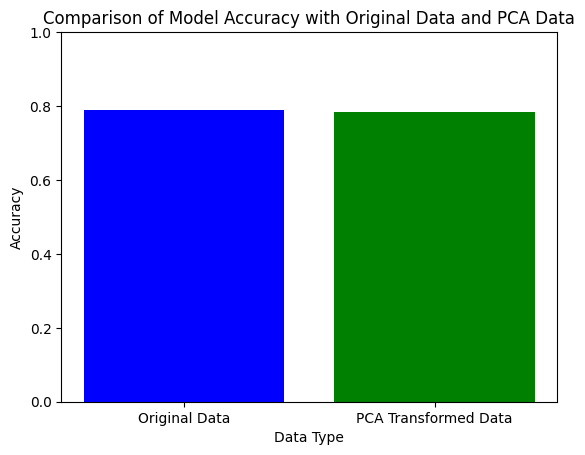

In [44]:
# مقارنة الدقة بين البيانات الأصلية و PCA
print(f"Accuracy with Original Data: {accuracy_original:.4f}")
print(f"Accuracy with PCA Transformed Data: {accuracy_pca:.4f}")

# رسم بياني لمقارنة الأداء بين النموذجين
import matplotlib.pyplot as plt

# إعداد الرسم البياني
labels = ['Original Data', 'PCA Transformed Data']
accuracies = [accuracy_original, accuracy_pca]

# رسم الرسم البياني
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Comparison of Model Accuracy with Original Data and PCA Data')
plt.xlabel('Data Type')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# تدريب النموذج باستخدام البيانات الأصلية
model = LogisticRegression()
model.fit(x_train, y_train)

# التنبؤ باستخدام البيانات الأصلية
pred_no_scaling = model.predict(x_test)

# حساب الـ MSE (Mean Squared Error)
mse_no_scaling = mean_squared_error(y_test, pred_no_scaling)

print(f"MSE without scaling: {mse_no_scaling:.4f}")


MSE without scaling: 0.2338


In [48]:
from sklearn.preprocessing import StandardScaler

# تطبيق StandardScaler على البيانات
scaler = StandardScaler()

# تدريب الموديل باستخدام البيانات المُحَجَّمة
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# تدريب النموذج باستخدام البيانات المحَجَّمة
model.fit(x_train_scaled, y_train)
pred_scaled = model.predict(x_test_scaled)

# حساب الـ MSE
mse_scaled = mean_squared_error(y_test, pred_scaled)

print(f"MSE with Standard Scaling: {mse_scaled:.4f}")


MSE with Standard Scaling: 0.2338


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

x_train_minmax = scaler_minmax.fit_transform(x_train)
x_test_minmax = scaler_minmax.transform(x_test)

# تدريب النموذج باستخدام البيانات المحَجَّمة
model.fit(x_train_minmax, y_train)
pred_minmax = model.predict(x_test_minmax)
mse_minmax = mean_squared_error(y_test, pred_minmax)

print(f"MSE with MinMax Scaling: {mse_minmax:.4f}")


MSE with MinMax Scaling: 0.2273


In [50]:
from sklearn.decomposition import PCA

# تطبيق PCA لتقليص الأبعاد
pca = PCA(n_components=2)  
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
model.fit(x_train_pca, y_train)
pred_pca = model.predict(x_test_pca)
mse_pca = mean_squared_error(y_test, pred_pca)

print(f"MSE with PCA: {mse_pca:.4f}")


MSE with PCA: 0.2662


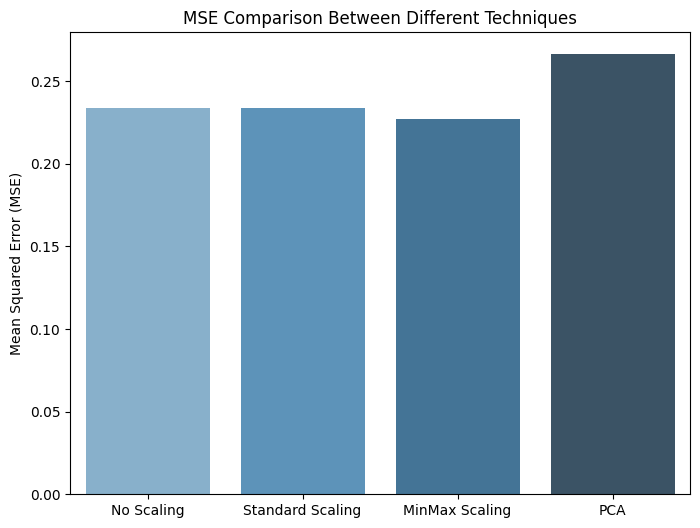

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء قائمة بالقيم لمقارنة الـ MSE
mse_results = [mse_no_scaling, mse_scaled, mse_minmax, mse_pca]
labels = ['No Scaling', 'Standard Scaling', 'MinMax Scaling', 'PCA']

# رسم مقارنة باستخدام Bar Plot
plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=mse_results, palette='Blues_d')
plt.title('MSE Comparison Between Different Techniques')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


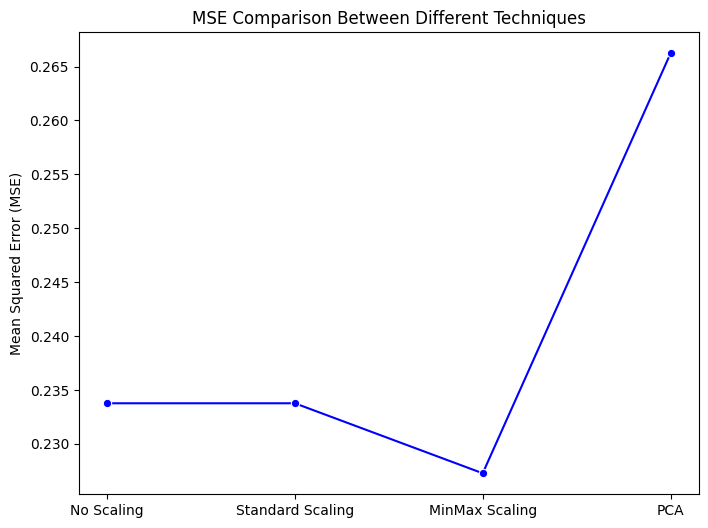

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء قائمة بالقيم لمقارنة الـ MSE
mse_results = [mse_no_scaling, mse_scaled, mse_minmax, mse_pca]
labels = ['No Scaling', 'Standard Scaling', 'MinMax Scaling', 'PCA']

# رسم مقارنة باستخدام Line Plot
plt.figure(figsize=(8,6))
sns.lineplot(x=labels, y=mse_results, marker='o', color='blue')
plt.title('MSE Comparison Between Different Techniques')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


In [53]:
# تأكد من تطبيق الـ scaling على كل من x_train و x_test بشكل متناسق
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))  # استخدم جميع الأعمدة عدا العمود الفئوي 'Outcome'

# تطبيق KMeans لتقسيم البيانات إلى 2 فئات (Clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_scaled)

data['Cluster'] = kmeans.labels_



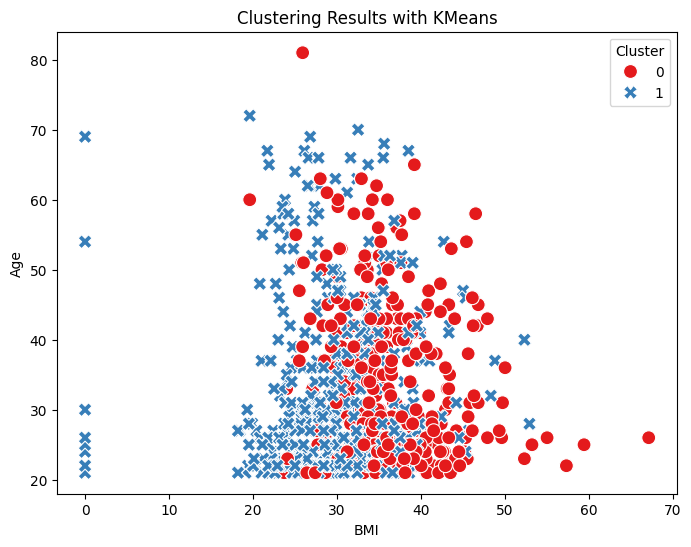

In [54]:
# رسم النتائج باستخدام seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['BMI'], y=data['Age'], hue=data['Cluster'], palette='Set1', style=data['Cluster'], s=100)
plt.title("Clustering Results with KMeans")
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = LogisticRegression()


model.fit(x_train, y_train)


def get_user_input():
    pregnancies = float(input("Enter number of Pregnancies: "))
    glucose = float(input("Enter Glucose level: "))
    blood_pressure = float(input("Enter Blood Pressure: "))
    skin_thickness = float(input("Enter Skin Thickness: "))
    insulin = float(input("Enter Insulin level: "))
    bmi = float(input("Enter BMI: "))
    diabetes_pedigree = float(input("Enter Diabetes Pedigree Function: "))
    age = int(input("Enter Age: "))
    
    return pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })


new_data = get_user_input()

# استخدام النموذج المدرب للتنبؤ
prediction = model.predict(new_data)

# عرض النتيجة
if prediction[0] == 1:
    print("النموذج يتوقع أن الشخص يعاني من مرض السكري.")
else:
    print("النموذج يتوقع أن الشخص لا يعاني من مرض السكري.")